# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Ahmad Siddiq Priaji
- **Email:** ahmadsiddiqp@gmail.com
- **ID Dicoding:** ahmad_siddiq_priaji

## Menentukan Pertanyaan Bisnis

- Bagaimana perkembangan jumlah penyewa sepeda per bulan selama dua tahun (2011-2012)?
- Apakah ada korelasi antara suhu, kecepatan angin, dan kelembapan dengan jumlah penyewa sepeda?
- Berapa jumlah penyewa sepeda berdasarkan perbedaan kondisi cuaca?
- Bagaimana pengaruh musim terhadap jumlah penyewa sepeda berdasarkan kategori pelanggan Casual dan Registered?
- Pada jam berapa jumlah penyewa sepeda yang terbanyak dan tersedikit?

## Import Semua Packages/Library yang Digunakan

In [303]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


1. pandas: untuk manipulasi data, seperti membaca, menulis, serta memproses data dalam format tabel (DataFrame).
2. matplotlib.pyplot: untuk membuat berbagai jenis visualisasi data, seperti grafik dan diagram.
3. seaborn: memudahkan pembuatan grafik dengan tampilan yang lebih estetis dan gaya yang lebih sederhana 
4. warnings: untuk menghilangkan output warnings yang tidak berpengaruh

In [304]:
warnings.filterwarnings("ignore")

## Data Wrangling

### Gathering Data

**Memuat tabel day**

In [305]:
day_df = pd.read_csv("./data/day.csv")
day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Memuat tabel hour**

In [306]:
hour_df = pd.read_csv("./data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Memuat tabel day_df dari file day.csv dan tabel hour_df dari file hour.csv
- Tabel day_df memiliki kolom instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, dan cnt
- Tabel hour_df memiliki kolom instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, dan cnt

### Assessing Data

**Menilai day_df**

In [307]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dari data yang terlihat di atas, terdapat satu kolom yang memiliki tipe data yang tidak sesuai, yaitu kolom dteday dengan tipeobject, seharusnya menggunakan tipe data datetime.

Berdasarkan informasi dari data day_df, ditemukan bahwa kolom-kolom seperti season, yr, mnth, holiday, weekday, workingday, dan weathersit memiliki tipe data int64 (numerik). Namun, dari isi data tersebut, atribut-atribut ini lebih sesuai jika menggunakan tipe data kategorikal.

In [308]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dari informasi di atas, pada tabel day_df tidak ditemukan kolom dengan nilai kosong

In [309]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Dari informasi di atas, pada tabel day_df tidak ditemukan duplikasi

In [310]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Menilai hour_df**

In [311]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Dari data yang terlihat di atas, terdapat satu kolom yang memiliki tipe data yang tidak sesuai, yaitu kolom dteday dengan tipeobject, seharusnya menggunakan tipe data datetime.

Berdasarkan informasi dari data hour_df, ditemukan bahwa kolom-kolom seperti season, yr, mnth, hr, holiday, weekday, workingday, dan weathersit memiliki tipe data int64 (numerik). Namun, dari isi data tersebut, atribut-atribut ini lebih sesuai jika menggunakan tipe data kategorikal.

In [312]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dari informasi di atas, pada tabel day_df tidak ditemukan kolom dengan nilai kosong

In [313]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Dari informasi di atas, pada tabel day_df tidak ditemukan duplikasi

In [314]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

#### Dropping

Menghapus kolom instant pada tabel day_df dan hour_df karena hanya berisi index dari data dan tidak memberikan informasi yang berguna

In [315]:
drop_col = ['instant']

for i in day_df.columns:
  if i in drop_col:
    day_df.drop(labels=i, axis=1, inplace=True)

for i in hour_df.columns:
  if i in drop_col:
    hour_df.drop(labels=i, axis=1, inplace=True)


#### Rename

Mengganti nama kolom-kolom yang ada di tabel day_df dan hour_df agar mudah dibaca dan dipahami

In [316]:
# Mengganti nama kolom di dataset day_df
day_df.rename(columns={'dteday':'dateday','yr':'year','mnth':'month','weekday':'day_of_week', 'weathersit':'weather_situation', 'windspeed':'wind_speed','cnt':'count_cr','hum':'humidity', 'workingday':"category_days"},inplace=True)

# Mengganti nama kolom di dataset hour_df
hour_df.rename(columns={'dteday':'dateday','yr':'year','hr':'hours','mnth':'month','weekday':'day_of_week', 'weathersit':'weather_situation','windspeed':'wind_speed','cnt':'count_cr','hum':'humidity', 'workingday':"category_days"},inplace=True)

Mengkonversi nilai dari beberapa kolom dari tabel day_df dan hour_df agar mudah dipahami

In [317]:
# konversi season menjadi: 1:Spring, 2:Summer, 3:Fall, 4:Winter
day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
hour_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

# konversi month menjadi: 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
day_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
hour_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# konversi weather_situation menjadi: 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
day_df.weather_situation.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
hour_df.weather_situation.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)

# konversi day_of_week menjadi: 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
day_df.day_of_week.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
hour_df.day_of_week.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

# konversi category_day menjadi: 0:weekend, 1:weekdays
day_df.category_days.replace((0,1), ('weekend','weekdays'), inplace=True)
hour_df.category_days.replace((0,1), ('weekend','weekdays'), inplace=True)

# konversi year menjadi: 0:2011, 1:2012
day_df.year.replace((0,1), ('2011','2012'), inplace=True)
hour_df.year.replace((0,1), ('2011','2012'), inplace=True)


#### Mengubah Tipe Data

Mengubah tipe data yang kurang sesuai seperti dateday menjadi datetime. Mengubah kolom season, year, month, hour, holiday, day_of_week, category_days, dan weather_sotuation menjadi category

In [318]:
# Mengubah tipe data ke datetime
day_df['dateday'] = pd.to_datetime(day_df.dateday)

# Mengubaha tipe data ke categorical
day_df['season'] = day_df.season.astype('category')
day_df['year'] = day_df.year.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['day_of_week'] = day_df.day_of_week.astype('category')
day_df['category_days'] = day_df.category_days.astype('category')
day_df['weather_situation'] = day_df.weather_situation.astype('category')


hour_df['dateday'] = pd.to_datetime(hour_df.dateday)

hour_df['season'] = hour_df.season.astype('category')
hour_df['year'] = hour_df.year.astype('category')
hour_df['month'] = hour_df.month.astype('category')
hour_df['hours'] =  hour_df.hours.astype("category")
hour_df['holiday'] = hour_df.holiday.astype('category')
hour_df['day_of_week'] = hour_df.day_of_week.astype('category')
hour_df['category_days'] = hour_df.category_days.astype('category')
hour_df['weather_situation'] = hour_df.weather_situation.astype('category')

In [319]:
day_df.head()

,dateday,season,year,month,holiday,day_of_week,category_days,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr
0,2011-01-01,Spring,2011,Jan,0,Saturday,weekend,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Spring,2011,Jan,0,Sunday,weekend,Misty,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Spring,2011,Jan,0,Monday,weekdays,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Spring,2011,Jan,0,Tuesday,weekdays,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Spring,2011,Jan,0,Wednesday,weekdays,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Di atas tampak tabel day_df setelah dilakukan cleaning

In [320]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   dateday            731 non-null    datetime64[ns]
 1   season             731 non-null    category      
 2   year               731 non-null    category      
 3   month              731 non-null    category      
 4   holiday            731 non-null    category      
 5   day_of_week        731 non-null    category      
 6   category_days      731 non-null    category      
 7   weather_situation  731 non-null    category      
 8   temp               731 non-null    float64       
 9   atemp              731 non-null    float64       
 10  humidity           731 non-null    float64       
 11  wind_speed         731 non-null    float64       
 12  casual             731 non-null    int64         
 13  registered         731 non-null    int64         
 14  count_cr  

Di atas tampak tipe data pada tabel day_df setelah dilakukan cleaning

In [321]:
hour_df.head()

,dateday,season,year,month,hours,holiday,day_of_week,category_days,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr
0,2011-01-01,Spring,2011,Jan,0,0,Saturday,weekend,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,2011,Jan,1,0,Saturday,weekend,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,2011,Jan,2,0,Saturday,weekend,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,2011,Jan,3,0,Saturday,weekend,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,2011,Jan,4,0,Saturday,weekend,Clear,0.24,0.2879,0.75,0.0,0,1,1


Di atas tampak tabel hour_df setelah dilakukan cleaning

In [322]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   dateday            17379 non-null  datetime64[ns]
 1   season             17379 non-null  category      
 2   year               17379 non-null  category      
 3   month              17379 non-null  category      
 4   hours              17379 non-null  category      
 5   holiday            17379 non-null  category      
 6   day_of_week        17379 non-null  category      
 7   category_days      17379 non-null  category      
 8   weather_situation  17379 non-null  category      
 9   temp               17379 non-null  float64       
 10  atemp              17379 non-null  float64       
 11  humidity           17379 non-null  float64       
 12  wind_speed         17379 non-null  float64       
 13  casual             17379 non-null  int64         
 14  regist

Di atas tampak tipe data pada tabel hour_df setelah dilakukan cleaning

## Exploratory Data Analysis (EDA)

### Explore ...

In [323]:
# melihat rangkuman parameter statistik dari data hour_df 
day_df.describe(include="all")

,dateday,season,year,month,holiday,day_of_week,category_days,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr
count,731,731,731,731,731.0,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,4,2,12,2.0,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,2012,Aug,0.0,Monday,weekdays,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,188,366,62,710.0,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


1. Bagaimana perkembangan jumlah penyewa sepeda per bulan selama dua tahun (2011-2012)?

In [324]:
# Tentukan urutan bulan yang benar
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Ubah kolom 'month' menjadi tipe data kategori dengan urutan bulan
day_df['month'] = pd.Categorical(day_df['month'], categories=month_order, ordered=True)

day_df.groupby(by=['year', 'month'], observed=False).agg({
    'count_cr': 'sum'
})

count_cr
year month          
2011 Jan       38189
     Feb       48215
     Mar       64045
     Apr       94870
     May      135821
     Jun      143512
     Jul      141341
     Aug      136691
     Sep      127418
     Oct      123511
     Nov      102167
     Dec       87323
2012 Jan       96744
     Feb      103137
     Mar      164875
     Apr      174224
     May      195865
     Jun      202830
     Jul      203607
     Aug      214503
     Sep      218573
     Oct      198841
     Nov      152664
     Dec      123713

Hasil di atas menunjukkan jumlah sepeda disewa berdasarkan tahun dan bulan. Data ini dikelompokkan menurut tahun (2011 dan 2012) dan bulan dari Januari hingga Desember.

- Pada tahun 2011, jumlah kejadian meningkat setiap bulan, dengan puncak di Juni sebesar 143.512 dan kemudian mengalami sedikit penurunan hingga akhir tahun.
- Pada tahun 2012, jumlah kejadian juga terus meningkat dari Januari hingga mencapai puncaknya di September sebesar 218.573, kemudian menurun hingga Desember.

Secara keseluruhan, jumlah kejadian di tahun 2012 lebih tinggi daripada tahun 2011, terutama di paruh kedua tahun 2012. Ini mungkin menunjukkan adanya peningkatan aktivitas yang signifikan di tahun tersebut.

2. Apakah ada korelasi antara suhu, kecepatan angin, dan kelembapan dengan jumlah penyewa sepeda?

In [325]:
# melihat jumlah penyewaan tiap pada value temp
day_df.groupby(by="temp", observed=False).count_cr.sum().reset_index()

,temp,count_cr
0,0.059130,981
1,0.096522,986
2,0.097391,1416
3,0.107500,2368
4,0.127500,1529
...,...,...
494,0.834167,5463
495,0.838333,3846
496,0.848333,3387
497,0.849167,3285


In [326]:
# melihat jumlah penyewaan tiap pada value wind_speed
day_df.groupby(by="wind_speed", observed=False).count_cr.sum().reset_index()

,wind_speed,count_cr
0,0.022392,4985
1,0.042304,5117
2,0.045404,5409
3,0.045408,1712
4,0.046650,5087
...,...,...
645,0.417908,1913
646,0.421642,2732
647,0.422275,4195
648,0.441563,5382


In [327]:
# melihat jumlah penyewaan tiap pada value humidity
day_df.groupby(by="humidity", observed=False).count_cr.sum().reset_index()

,humidity,count_cr
0,0.000000,623
1,0.187917,1635
2,0.254167,6857
3,0.275833,5169
4,0.290000,5102
...,...,...
590,0.948261,605
591,0.949583,2594
592,0.962500,1607
593,0.970417,705


In [328]:
# Menghitung korelasi antara variabel dengan 'count' pada hour_df
correlation_windspeed = day_df['wind_speed'].corr(day_df['count_cr'])
correlation_temperature = day_df['temp'].corr(day_df['count_cr'])
correlation_humidity = day_df['humidity'].corr(day_df['count_cr'])

print("Korelasi antara 'wind_speed' dan 'count_cr':", correlation_windspeed)
print("Korelasi antara 'temp' dan 'count_cr':", correlation_temperature)
print("Korelasi antara 'humidity' dan 'count_cr':", correlation_humidity)


Korelasi antara 'wind_speed' dan 'count_cr': -0.23454499742167004
Korelasi antara 'temp' dan 'count_cr': 0.6274940090334918
Korelasi antara 'humidity' dan 'count_cr': -0.10065856213715522


Dari hasil di atas merupakan korelasi pada tabel day_df. Didapatkan hasil berikut 
- **Korelasi antara 'wind_speed' dan 'count_cr'**: Nilai korelasi sebesar -0.234 menunjukkan hubungan negatif yang lemah antara kecepatan angin dan jumlah kejadian (count_cr). Artinya, saat kecepatan angin meningkat, jumlah kejadian cenderung menurun, tetapi hubungan ini tidak terlalu kuat.
- **Korelasi antara 'temp' dan 'count_cr'**: Nilai korelasi 0.627 menunjukkan hubungan positif yang cukup kuat antara suhu dan jumlah kejadian. Ini berarti ketika suhu meningkat, jumlah kejadian cenderung meningkat juga.
- **Korelasi antara 'humidity' dan 'count_cr'**: Nilai korelasi -0.100 menunjukkan hubungan negatif yang sangat lemah antara kelembaban dan jumlah kejadian. Hubungan ini sangat lemah sehingga peningkatan atau penurunan kelembaban tidak terlalu memengaruhi jumlah kejadian.

3. Berapa jumlah penyewa sepeda berdasarkan perbedaan kondisi cuaca?

In [329]:
# melihat jumlah penyewaan pada tiap kondisi cuaca 
day_df.groupby(by="weather_situation", observed=False).count_cr.sum().sort_values(ascending=False).reset_index().head(10)

,weather_situation,count_cr
0,Clear,2257952
1,Misty,996858
2,Light_rainsnow,37869


Berdasarkan hasil di atas menunjukkan jumlah sepeda disewa pada 3 kondisi cuaca yang berbeda pada tabel day_df. Terdapat 2.257.952 kejadian saat cuaca cerah, yang merupakan jumlah tertinggi di antara semua kondisi cuaca. Terdapat 996.858 kejadian ketika kondisi cuaca berkabut. Terdapat 37.869 kejadian saat hujan atau salju ringan, yang merupakan jumlah terendah.

4. Bagaimana pengaruh musim terhadap jumlah penyewa sepeda berdasarkan kategori pelanggan Casual dan Registered?

In [330]:
# melihat jumlah penyewaan tiap season 
day_df.groupby(by="season", observed=False).agg({
    'casual': 'sum',
    'registered': 'sum',
    'count_cr': 'sum'
})

,casual,registered,count_cr
season,,,
Fall,226091,835038,1061129
Spring,60622,410726,471348
Summer,203522,715067,918589
Winter,129782,711831,841613


Hasil di atas menunjukkan jumlah speda disewa yang dikelompokkan berdasarkan musim (season), dengan rincian jumlah sepeda disewa untuk kategori pengguna kasual (casual) dan terdaftar (registered). 
- Terdapat 226.091 pengguna kasual dan 835.038 pengguna terdaftar, dengan total 1.061.129 kejadian. Ini adalah jumlah total kejadian tertinggi di antara semua musim. 
- Terdapat 60.622 pengguna kasual dan 410.726 pengguna terdaftar, dengan total 471.348 kejadian. Jumlah kejadian di musim semi merupakan yang terendah.
- Terdapat 203.522 pengguna kasual dan 715.067 pengguna terdaftar, dengan total 918.589 kejadian. Terdapat 129.782 pengguna kasual dan 711.831 pengguna terdaftar, dengan total 841.613 kejadian.

In [331]:
# melihat rangkuman parameter statistik dari data hour_df 
hour_df.describe(include="all")

,dateday,season,year,month,hours,holiday,day_of_week,category_days,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr
count,17379,17379,17379,17379,17379.0,17379.0,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,4,2,12,24.0,2.0,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,2012,Jul,17.0,0.0,Saturday,weekdays,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4496,8734,1488,730.0,16879.0,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


5. Pada jam berapa jumlah penyewa sepeda yang terbanyak dan tersedikit?

In [332]:
# penyewaan berdasarkan jam
hour_df.groupby(by="hours", observed=False).agg({
    "count_cr": 'sum'
})

,count_cr
hours,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171
8,261001


Hasil di atas menunjukkan jumlah sepeda disewa berdasarkan jam dalam sehari, dari jam 0 hingga 23, dari keseluruhan dataset hour_df. Dapat diketahui bahwa jumlah sepeda disewa paling banyak terjadi pada jam 17.00 sedangkan jumlah sepeda disewa paling sedikit dimiliki pada jam 04.00

## Visualization & Explanatory Analysis

### 1. Bagaimana perkembangan jumlah penyewa sepeda per bulan selama dua tahun (2011-2012)?

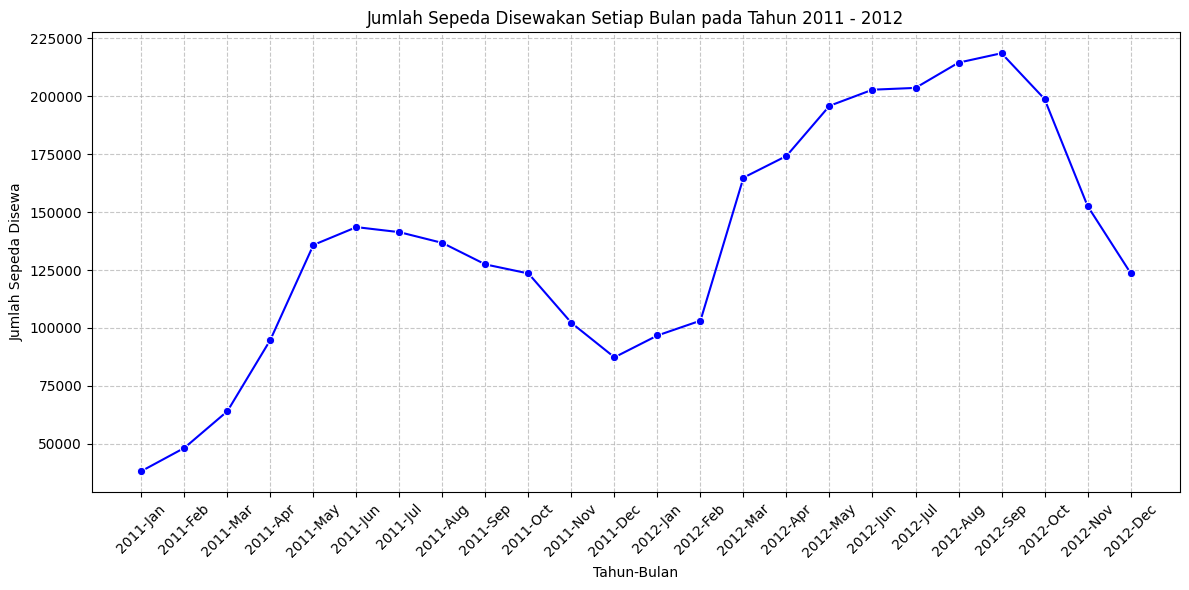

In [333]:
# Pastikan data diurutkan berdasarkan 'year' dan 'month'
day_df['month'] = pd.Categorical(day_df['month'], categories=[
    'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    ordered=True)

# Kelompokkan data berdasarkan 'year' dan 'month'
monthly_counts = day_df.groupby(by=["year", "month"], observed=False).agg({
    "count_cr": "sum"
}).reset_index()

# Buat kolom gabungan untuk memudahkan pengurutan
monthly_counts['year_month'] = monthly_counts['year'].astype(str) + '-' + monthly_counts['month'].astype(str)

# Urutkan data berdasarkan year dan month
monthly_counts = monthly_counts.sort_values(by=['year', 'month'])

plt.figure(figsize=(12, 6))

sns.lineplot(
    data=monthly_counts,
    x="year_month",
    y="count_cr",
    marker="o",
    color="blue"  
)

# Tambahkan grid
plt.grid(True, linestyle='--', alpha=0.7)

plt.title("Jumlah Sepeda Disewakan Setiap Bulan pada Tahun 2011 - 2012")
plt.xticks(rotation=45) 
plt.xlabel("Tahun-Bulan")
plt.ylabel("Jumlah Sepeda Disewa")
plt.tight_layout()
plt.show()


Grafik diatas merupakan grafik garis yang menunjukkan perkembangan jumlah sepeda yang disewakan setiap bulan selama tahun 2011 dan 2012.

Pada tahun 2011, jumlah penyewa sepeda meningkat secara signifikan dari bulan Januari hingga bulan Juni, dengan pertumbuhan yang paling pesat terjadi antara bulan April dan Juni. Jumlah penyewa mencapai puncaknya pada bulan Juni 2011. Setelah mencapai puncak, terjadi penurunan jumlah penyewa mulai Juli hingga Desember. 

Pada awal tahun 2012, terjadi peningkatan kembali jumlah penyewa sepeda, dengan bulan Februari menunjukkan pertumbuhan pesat dibandingkan bulan-bulan sebelumnya. Terdapat fluktuasi jumlah penyewa di berbagai bulan hingga mencapai jumlah tertinggi pada bulan Spetember. Menjelang akhir tahun, tren penurunan kembali terlihat, mirip dengan pola yang terjadi di tahun 2011.

### 2. Apakah ada korelasi antara suhu, kecepatan angin, dan kelembapan dengan jumlah penyewa sepeda?

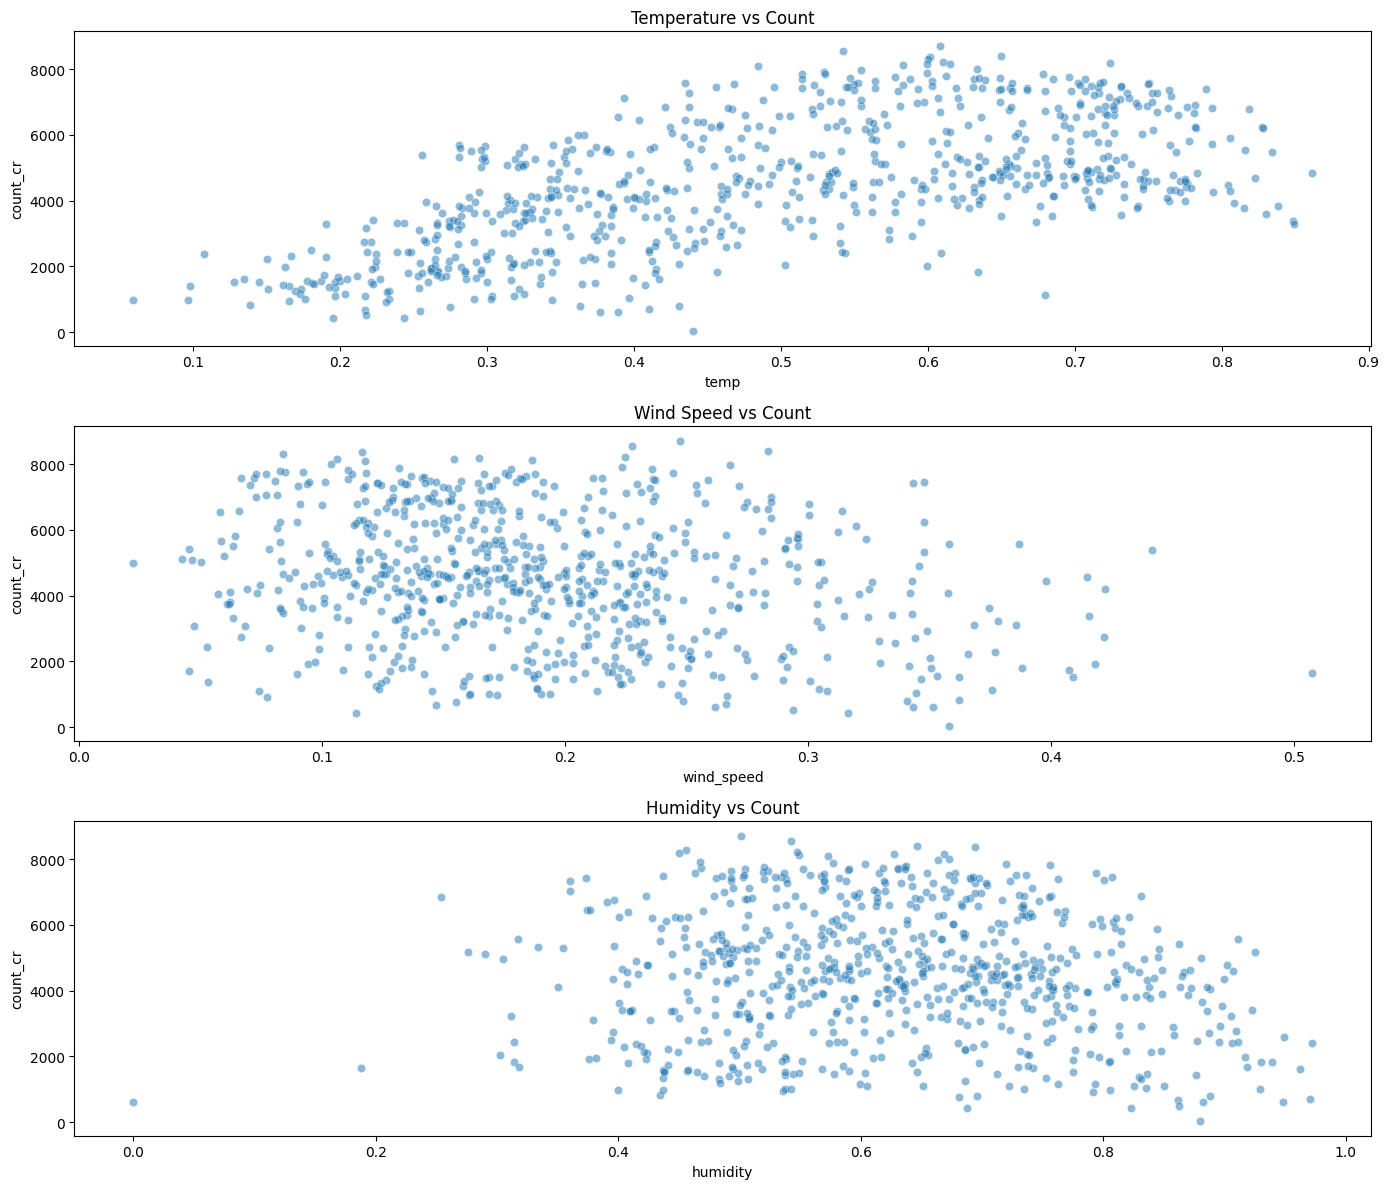

In [334]:
plt.figure(figsize=(14, 12))

# Scatter plot untuk 'temp' vs 'count'
plt.subplot(3, 1, 1)
sns.scatterplot(
    x='temp',
    y='count_cr',
    data=day_df,
    alpha=0.5
)
plt.title('Temperature vs Count')

# Scatter plot untuk 'atemp' vs 'count'
plt.subplot(3, 1, 2)
sns.scatterplot(
    x='wind_speed',
    y='count_cr',
    data=day_df,
    alpha=0.5
)
plt.title('Wind Speed vs Count')

# Scatter plot untuk 'hum' vs 'count'
plt.subplot(3, 1, 3)
sns.scatterplot(
    x='humidity',
    y='count_cr',
    data=day_df,
    alpha=0.5
)
plt.title('Humidity vs Count')

plt.subplots_adjust(hspace=0.5)  

plt.tight_layout()
plt.show()

Visualisasi tersebut menunjukkan tiga grafik scater plot yang masing-masing menghubungkan jumlah penyewa sepeda (count_cr) dengan variabel cuaca yang berbeda: suhu (temp), kecepatan angin (wind_speed), dan kelembapan (humidity). 

**Temperature vs Count:** Grafik menunjukkan hubungan antara suhu dan jumlah penyewa sepeda. Nilai korelasi antara temp dan count_cr adalah 0.6275, yang menunjukkan hubungan positif yang cukup kuat. Artinya, ketika suhu meningkat, jumlah penyewa sepeda cenderung juga meningkat. Hal ini mungkin disebabkan oleh cuaca yang lebih hangat yang mendorong lebih banyak orang untuk menggunakan sepeda.

**Wind Speed vs Count:** Grafik menunjukkan hubungan antara kecepatan angin dan jumlah penyewa sepeda. Nilai korelasi antara wind_speed dan count_cr adalah -0.2345, yang menunjukkan hubungan negatif yang lemah. Ini berarti bahwa peningkatan kecepatan angin cenderung berhubungan dengan penurunan jumlah penyewa sepeda, meskipun hubungan ini tidak sangat kuat. Angin yang kencang mungkin membuat orang kurang nyaman untuk bersepeda.

**Humidity vs Count:** Grafik menunjukkan hubungan antara kelembapan dan jumlah penyewa sepeda. Nilai korelasi antara humidity dan count_cr adalah -0.1007, yang menunjukkan hubungan negatif yang sangat lemah. Ini menunjukkan bahwa kelembapan tidak memiliki pengaruh signifikan terhadap jumlah penyewa sepeda, meskipun ada kecenderungan bahwa peningkatan kelembapan sedikit berhubungan dengan penurunan jumlah penyewa.

### 3. Berapa jumlah sepeda disewa berdasarkan perbedaan kondisi cuaca?

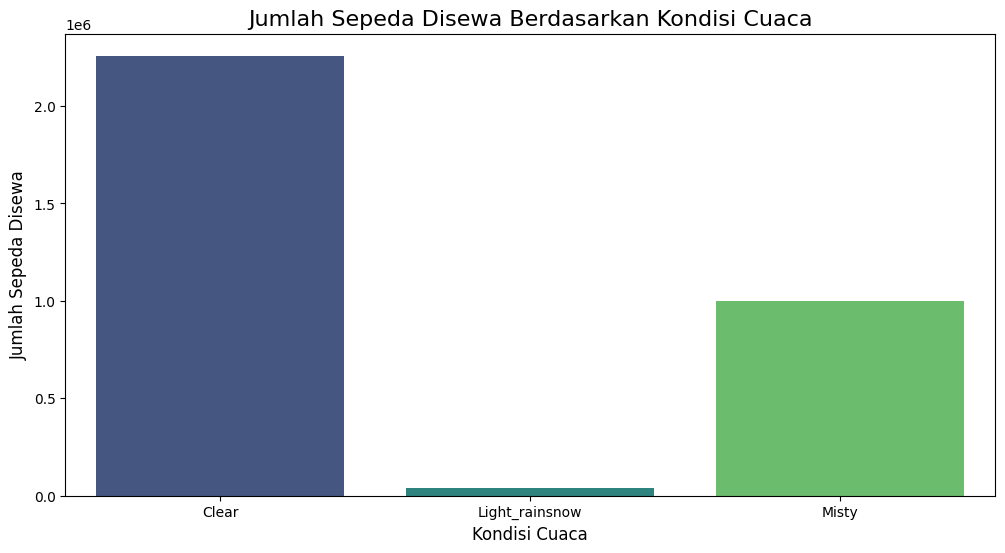

In [335]:
# Mengelompokkan data berdasarkan kondisi cuaca dan menghitung jumlah penggunaan sepeda
count_by_weather = day_df.groupby('weather_situation', observed=False)['count_cr'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='weather_situation', y='count_cr', data=count_by_weather, 
            palette='viridis')

plt.title('Jumlah Sepeda Disewa Berdasarkan Kondisi Cuaca', fontsize=16)
plt.xlabel('Kondisi Cuaca', fontsize=12)
plt.ylabel('Jumlah Sepeda Disewa', fontsize=12)

plt.show()

Visualisasi tersebut menampilkan hubungan antara kondisi cuaca dengan jumlah sepeda yang disewa.

- Jumlah sepeda yang disewa saat cuaca cerah (Clear) paling tinggi, mencapai lebih dari 2 juta penyewaan. Ini menunjukkan bahwa pengguna lebih cenderung menyewa sepeda ketika cuaca dalam kondisi cerah.
- Pada kondisi berkabut (Misty), jumlah sepeda yang disewa lebih sedikit dibandingkan dengan cuaca cerah, sekitar 996.858 penyewaan. Ini mungkin menunjukkan bahwa meskipun cuaca berkabut, masih ada minat untuk menyewa sepeda, meskipun tidak setinggi saat cerah.
- Jumlah sepeda yang disewa pada kondisi hujan atau salju ringan (Light_rainsnow) sangat kecil, hanya sekitar 37.869 penyewaan. Kondisi ini mungkin dianggap tidak ideal oleh penyewa sepeda, sehingga mereka tidak menyewa sepeda pada kondisi cuaca ini.


### 4. Bagaimana pengaruh musim terhadap jumlah penyewa sepeda berdasarkan kategori pelanggan Casual dan Registered?

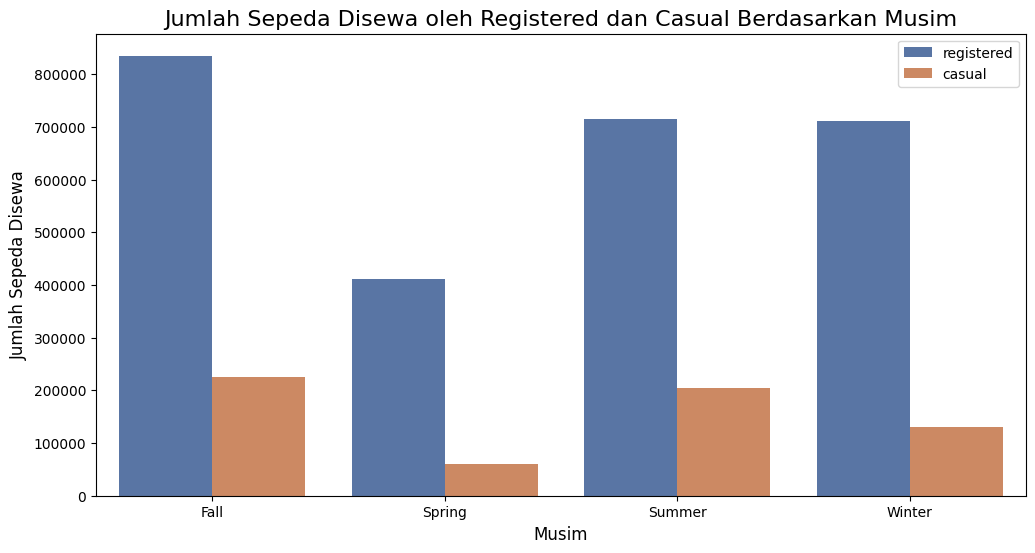

In [336]:
# Mengelompokkan data berdasarkan musim dan menghitung jumlah penggunaan terdaftar dan tidak terdaftar
seasonal_usage = day_df.groupby('season', observed=False)[['registered', 'casual']].sum().reset_index()

seasonal_usage_long = pd.melt(seasonal_usage, 
                              id_vars=['season'], 
                              value_vars=['registered', 'casual'],
                              var_name='user_type', 
                              value_name='count')

plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='count', hue='user_type', data=seasonal_usage_long, 
            palette='deep')

plt.title('Jumlah Sepeda Disewa oleh Registered dan Casual Berdasarkan Musim', fontsize=16)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Jumlah Sepeda Disewa', fontsize=12)

plt.legend( fontsize='10')

plt.show()

Visualisasi ini menunjukkan jumlah sepeda yang disewa oleh pengguna registered (terdaftar) dan casual (tidak terdaftar) berdasarkan musim. 

Pada musim gugur (Fall), penyewaan sepeda paling tinggi terjadi di musim ini. Pengguna terdaftar menyewa lebih banyak sepeda (sekitar 835.038 penyewaan) dibandingkan pengguna kasual (226.091 penyewaan). Total penyewaan sepeda di musim ini adalah 1.061.129 penyewaan.

Pada musim semi (Spring), penyewaan sepeda di musim semi lebih rendah dibandingkan musim lainnya. Pengguna terdaftar menyewa sekitar 410.726 sepeda, sementara pengguna kasual menyewa sekitar 60.622 sepeda. Total penyewaan di musim semi adalah 471.348 penyewaan, menjadikannya musim dengan jumlah penyewaan terendah.

Musim panas (Summer) memiliki jumlah penyewaan yang cukup tinggi, dengan penyewaan oleh pengguna terdaftar mencapai 715.067, dan oleh pengguna kasual sekitar 203.522. Total penyewaan di musim panas adalah 918.589, yang sedikit lebih rendah dibandingkan musim gugur.

Pada musim dingin (Winter), Jumlah penyewaan di musim dingin hampir sama dengan musim panas. Pengguna terdaftar menyewa sekitar 711.831 sepeda, dan pengguna kasual menyewa sekitar 129.782 sepeda. Total penyewaan di musim dingin mencapai 841.613 penyewaan.

### 5. Pada jam berapa jumlah penyewa sepeda yang terbanyak dan tersedikit?

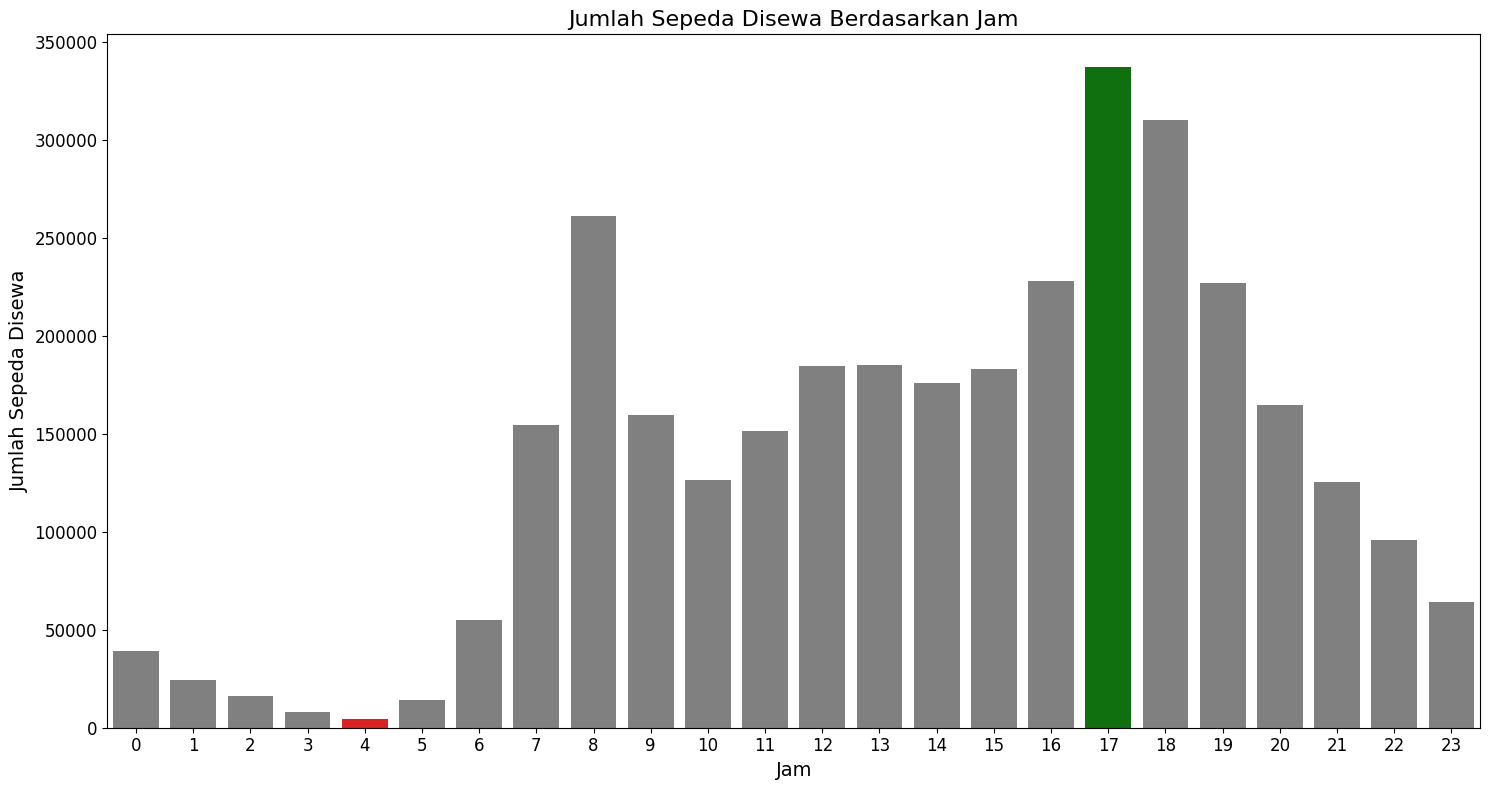

In [337]:
sum_count_hourly = hour_df.groupby("hours").count_cr.sum().reset_index()

# Mencari jam dengan count_cr terbesar dan terkecil
max_count = sum_count_hourly["count_cr"].max()
min_count = sum_count_hourly["count_cr"].min()

fig, ax = plt.subplots(figsize=(15, 8)) 

# # Memberikan warna yang berbeda untuk nilai terbesar dan terkecil
colors = ["green" if count == max_count else "red" if count == min_count else "gray" 
          for count in sum_count_hourly["count_cr"]]

sns.barplot(x="hours", y="count_cr", data=sum_count_hourly, palette=colors, ax=ax)

ax.set_ylabel("Jumlah Sepeda Disewa", fontsize=14)
ax.set_xlabel("Jam", fontsize=14)
ax.set_title("Jumlah Sepeda Disewa Berdasarkan Jam", loc="center", fontsize=16)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)

plt.tight_layout()
plt.show()


Visualisasi ini menunjukkan jumlah total sepeda yang disewa berdasarkan jam dari 00:00 sampai 23:00. 

- Jumlah penyewaan paling sedikit terjadi pada jam 4:00 pagi. Ini ditandai dengan bar merah yang sangat kecil, menunjukkan bahwa sangat sedikit orang yang menyewa sepeda pada jam tersebut. Selain itu, pukul 16:00 dan 18:00 juga menunjukkan jumlah penyewaan yang cukup tinggi, menggambarkan tren penggunaan sepeda di sekitar jam-jam sibuk sore hari.

- Jumlah penyewaan paling banyak terjadi pada jam 17:00 sore, ditandai dengan bar hijau yang tinggi, yang menunjukkan puncak aktivitas penyewaan sepeda mendekati 350.000 penyewaan. Ini kemungkinan bertepatan dengan jam pulang kerja atau sekolah, di mana banyak orang menggunakan sepeda sebagai moda transportasi.

Pada jam-jam sibuk, jumlah penyewaan sepeda tertinggi terjadi pada pukul 17:00 sore, ditandai dengan bar hijau pada grafik, yang menunjukkan hampir 350.000 penyewaan. Ini kemungkinan mencerminkan tingginya penggunaan sepeda pada jam pulang kerja atau sekolah. 

Di pagi hari, puncak penyewaan sepeda lainnya terjadi pada pukul 8:00, dengan lebih dari 250.000 penyewaan. Waktu ini mungkin menandakan banyak orang yang menggunakan sepeda sebagai sarana transportasi untuk berangkat kerja atau sekolah.

Sementara itu, jam sepi dalam penyewaan sepeda terjadi pada pukul 4:00 pagi, yang ditandai dengan bar merah kecil pada grafik. Hal ini wajar, mengingat dini hari adalah waktu di mana sebagian besar orang tidak aktif. Secara umum, penyewaan sepeda sangat rendah pada jam 1:00 hingga 5:00 pagi.

Aktivitas penyewaan di siang hari mulai menurun secara bertahap setelah puncak pagi pada pukul 8:00, hingga mencapai stabil sekitar pukul 12:00 hingga 15:00, dengan jumlah penyewaan konsisten di atas 150.000. Setelah puncak sore hari pada pukul 17:00, jumlah penyewaan mulai berkurang di malam hari, terutama setelah pukul 20:00, dan terus menurun hingga tengah malam.

## Analisis Lanjutan (Opsional)

1. Analisis Clustering

Melakukan clustering pada tabel day_df berdasarkan kategori Situasi Cuacya yaitu pada kolom weather_situation

In [338]:
day_df.groupby(by="weather_situation").size().reset_index(name='count')

,weather_situation,count
0,Clear,463
1,Light_rainsnow,21
2,Misty,247


Dari hasil clustering pada tabel day_df tersebut dihasilkan 3 cluster dari weater_situation yaitu Clear sebanyak 463, Ligth_rainsnow sebabnyak 21, dan Misty sebanyak 247. 

Melakukan CLustering Binning pada tabel day_df pada kolom Suhu (temp) menjadi Kategori Suhu (temp_category). Rentang suhu dibagi menjadi lima kelompok (bin) yang sama panjang, yaitu:
- 0 - 0.2: Very Cold (Sangat Dingin)
- 0.2 - 0.4: Cold (Dingin)
- 0.4 - 0.6: Normal
- 0.6 - 0.8: Warm (Hangat)
- 0.8 - 1.0: Hot (Panas)

In [339]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = ['Very Cold', 'Cold', 'Normal', 'Warm', 'Hot']

day_df['temp_category'] = pd.cut(day_df['temp'], bins=bins, labels=labels, include_lowest=True)

day_df.groupby(by="temp_category").size().reset_index(name='count')

,temp_category,count
0,Very Cold,34
1,Cold,227
2,Normal,216
3,Warm,238
4,Hot,16


Dari hasil clustering dengan binning pada tabel day_df tersebut dihasilkan 5 cluster dari temp_category yaitu Very Cold sebanyak 34 baris, Cold sebanyak 227 baris, Normal 216 baris, Warm 238, dan Hot sebanyak 16.

Melakukan CLustering Binning pada tabel day_df pada kolom Jumlah Sepeda Disewa (count_cr) menjadi Kategori Rental (rental_category). Rentang jumlah dibagi menjadi lima kelompok (bin) yang sama panjang, yaitu:
- 0 - 1000: Very Low
- 1000 - 3000: Low 
- 3000 - 5000: Medium
- 5000 - 8000: High 
- 8000 - 10000: Very High

In [340]:
bins = [0, 1000, 3000, 5000, 8000, 10000]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

day_df['rental_category'] = pd.cut(day_df['count_cr'], bins=bins, labels=labels, right=True)

day_df.groupby(by="rental_category").size().reset_index(name='count')

,rental_category,count
0,Very Low,19
1,Low,153
2,Medium,273
3,High,274
4,Very High,12


Dari hasil clustering dengan binning pada tabel day_df tersebut dihasilkan 5 cluster dari rental_category yaitu Very Low sebanyak 19 baris, Low sebanyak 153 baris, Medium 273 baris, High 274, dan Very High sebanyak 12.

2. RFM Analysis

In [341]:
current_date = max(hour_df['dateday'])
rfm_df = hour_df.groupby('registered').agg({
    'dateday': lambda x: (current_date - x.max()).days,  # Recency
    'season': 'count',  # Frequency
    'count_cr': 'sum'  # Monetary
}).reset_index()

# Mengganti nama kolom
rfm_df.columns = ['registered', 'Recency', 'Frequency', 'Monetary']

print(rfm_df.head())

   registered  Recency  Frequency  Monetary
0           0       38         24        35
1           1        0        201       294
2           2        1        245       648
3           3        0        294      1154
4           4        3        307      1602


## Conclusion

- Conclution pertanyaan 1: Perkembangan jumlah penyewa sepeda per bulan selama dua tahun (2011-2012), dapat disimpulkan bahwa terdapat pola musiman dalam penggunaan sepeda. Pada kedua tahun tersebut, terjadi peningkatan jumlah penyewa selama paruh pertama tahun, dengan puncaknya di pertengahan tahun (Juni 2011 dan September 2012). Setelah mencapai puncak, terjadi penurunan jumlah penyewa pada paruh kedua tahun, khususnya menjelang akhir tahun. Jumlah penyewaan pada tahun 2012 lebih tinggi dibandingkan tahun 2011. 

- Conclution pertanyaan 2: Analisis korelasi menunjukkan bahwa suhu memiliki hubungan positif yang kuat dengan jumlah penyewa sepeda (korelasi 0.6275), di mana peningkatan suhu cenderung meningkatkan jumlah penyewa. Sebaliknya, kecepatan angin memiliki korelasi negatif yang lemah (korelasi -0.2345), mengindikasikan bahwa angin kencang sedikit mengurangi jumlah penyewa, sementara kelembapan memiliki korelasi negatif yang sangat lemah (korelasi -0.1007) dan tidak berpengaruh signifikan. Secara keseluruhan, suhu adalah faktor cuaca yang paling mempengaruhi jumlah penyewa sepeda, sedangkan kecepatan angin dan kelembapan memiliki pengaruh yang minimal.

- Conclution pertanyaan 3: Analisis jumlah sepeda yang disewa berdasarkan kondisi cuaca menunjukkan bahwa cuaca cerah (Clear) mendorong penyewaan tertinggi, dengan lebih dari 2 juta penyewaan. Jumlah penyewa saat berkabut (Misty) lebih rendah, sekitar 996.858, meskipun masih ada minat untuk menyewa. Sebaliknya, kondisi hujan atau salju ringan (Light_rainsnow) sangat sedikit, hanya sekitar 37.869 penyewaan, menunjukkan bahwa cuaca buruk mengurangi minat pengguna untuk menyewa sepeda. Secara keseluruhan, cuaca cerah secara signifikan meningkatkan jumlah penyewa sepeda

- Conclution pertanyaan 4: Analisis pengaruh musim terhadap jumlah penyewa sepeda menunjukkan bahwa musim gugur (Fall) memiliki penyewaan tertinggi, dengan total 1.061.129, terdiri dari 835.038 penyewaan oleh pengguna terdaftar dan 226.091 oleh pengguna kasual. Musim panas (Summer) juga cukup tinggi, dengan total 918.589 penyewaan. Sebaliknya, musim semi (Spring) mencatat penyewaan terendah, hanya 471.348, sementara musim dingin (Winter) hampir setara dengan musim panas, mencapai 841.613 penyewaan. Secara keseluruhan, musim gugur adalah yang paling menguntungkan, sedangkan musim semi adalah yang terendah.

- Conclution pertanyaan 5: Penyewaan sepeda tertinggi terjadi pada pukul 17:00 sore, mencapai hampir 350.000 penyewaan, mencerminkan puncak aktivitas saat pulang kerja atau sekolah. Puncak kedua tercatat pada pukul 8:00 pagi, dengan lebih dari 250.000 penyewaan. Sebaliknya, penyewaan terendah terjadi pada pukul 4:00 pagi, menunjukkan waktu sepi dengan aktivitas yang sangat minim. Secara keseluruhan, penyewaan rendah antara jam 1:00 hingga 5:00 pagi, meningkat saat jam sibuk, dan menurun setelah pukul 20:00.